# 18.C06 Problem Set 4

A Julia notebook (`.ipynb`) version of this file is available on the [18.C06 Canvas site](https://canvas.mit.edu/courses/27395/assignments) under "Assignments".

Due Friday 10/4 at **11am**; 10% penalty if it is turned in within 24 hours, and after that late psets will not be accepted.   Submit in PDF format: a decent-quality scan/image of any handwritten solutions (e.g. get a scanner app on your phone or use a tablet), and a PDF printout of your Jupyter notebook showing your code and (clearly labeled) results.

**TO GENERATE A PDF OF YOUR JUPYTER NOTEBOOK:** From the *File* pull-down menu, select *Save and Export Notebook As*, and then select the *HTML* format (not PDF).  Then open the downloaded HTML file with your favorite browser, and use the browser's *Print* function to generate the PDF file.

## Problem 1 (5+5+5+5 points)

**(a)** If $P$ is the projection matrix onto the null space of $A$, then $Py − y$, for any $y$, is in the \_\_\_\_\_\_\_\_\_\_ space of $A$.

**(b)** If $Ax = b$ has a solution $x$, then the closest vector to $b$ in $N(A^T)$ is \_\_\_\_\_\_\_\_\_\_.  (Try drawing a picture.)

**(c)** If the *rows* of $A$ (an $m \times n$ matrix) are independent, then the dimension $N(A^T A)$ is \_\_\_\_\_\_\_\_\_\_.

**(d)** If a matrix $U$ has orthonormal *rows*, then $I = \_\_\_\_\_\_\_\_\_\_$  and the projection matrix onto the row space of U is \_\_\_\_\_\_\_\_\_\_. (Your answers should be simplified expressions involving $U$ and $U^T$ only.)

## Problem 2 (5+5 points)

Suppose that $A$ is a square, invertible matrix.

**(a)** Explain why $A^T$ must also be invertible, and why $(A^T)^{-1} = (A^{-1})^T$.  (Hint: use the fact that $(AB)^T = B^T A^T$.)

**(b)** The first column of $A^{-1}$ is orthogonal to the space spanned by which rows of $A$?  (Hint: think about $AA^{-1} = I$.)

## Problem 3 (2+2+2 points)

(from Strang book ch. 4)

If $AB = 0$, then the columns of $B$ are in the \_\_\_\_ of $A$.  The rows of $A$ are in the \_\_\_\_ of $B$.
Why can't $A$ and $B$ be $3 \times 3$ matrices of rank 2?

## Problem 4 (5+5+5 points)

**(a)** What matrix $P$ projects every vector in $\mathbb{R}^3$ onto the line that passes through origin and $a = [3, 4, 5]$ (column vector)?

**(b)** What is the nullspace of that matrix $P$?  (Give a basis.)

**(c)** What is the row space of $P^7$?

In [3]:
# projection matrix P
P = [9  12 15
     12 16 20
     15 20 25]

3×3 Matrix{Int64}:
  9  12  15
 12  16  20
 15  20  25

In [5]:
# checking basis vectors
x1 = [(-4/3) 
      1 
      0     ]
N1 = P*x1

3-element Vector{Float64}:
 0.0
 0.0
 0.0

In [6]:
# checking basis vectors
x2 = [(-5/3)
       0
       1    ]
N2 = P*x2

3-element Vector{Float64}:
 0.0
 0.0
 0.0

## Problem 5 (10 points)

(From Strang book, p. 188)

Let $A = \begin{pmatrix} 1 & 2 & 4 \\ 0 & 0 & 5 \\ 0 & 3 & 6 \end{pmatrix}$

Find the QR factorization of $A$ (give $Q$ and $R$) by Gram–Schmidt.   Check your answer against Julia by running `qr(A)` with this matrix (after `using LinearAlgebra`).

In [14]:
using LinearAlgebra
A = [1 2 4
     0 0 5
     0 3 6]
QR = qr(A)

LinearAlgebra.QRCompactWY{Float64, Matrix{Float64}, Matrix{Float64}}
Q factor: 3×3 LinearAlgebra.QRCompactWYQ{Float64, Matrix{Float64}, Matrix{Float64}}
R factor:
3×3 Matrix{Float64}:
 1.0   2.0   4.0
 0.0  -3.0  -6.0
 0.0   0.0  -5.0

In [17]:
QR.R

3×3 Matrix{Float64}:
 1.0   2.0   4.0
 0.0  -3.0  -6.0
 0.0   0.0  -5.0

In [18]:
Matrix(QR.Q)

3×3 Matrix{Float64}:
 1.0   0.0   0.0
 0.0   0.0  -1.0
 0.0  -1.0   0.0

## Problem 6 (5 points)

Find the orthogonal projection of the vector $b = \begin{pmatrix} 2 \\ 6 \\ 4 \end{pmatrix}$ onto the plane $x - y -2z = 0$.

You can find this especially easily by *subtracting* the projection of $b$ onto \_\_\_\_\_\_\_\_\_ .

## Problem 7 (10+10 points)

The following problem is adapted from the [VMLS book](https://web.stanford.edu/~boyd/vmls/), additional [exercise 13.3](https://web.stanford.edu/~boyd/vmls/vmls-additional-exercises.pdf):

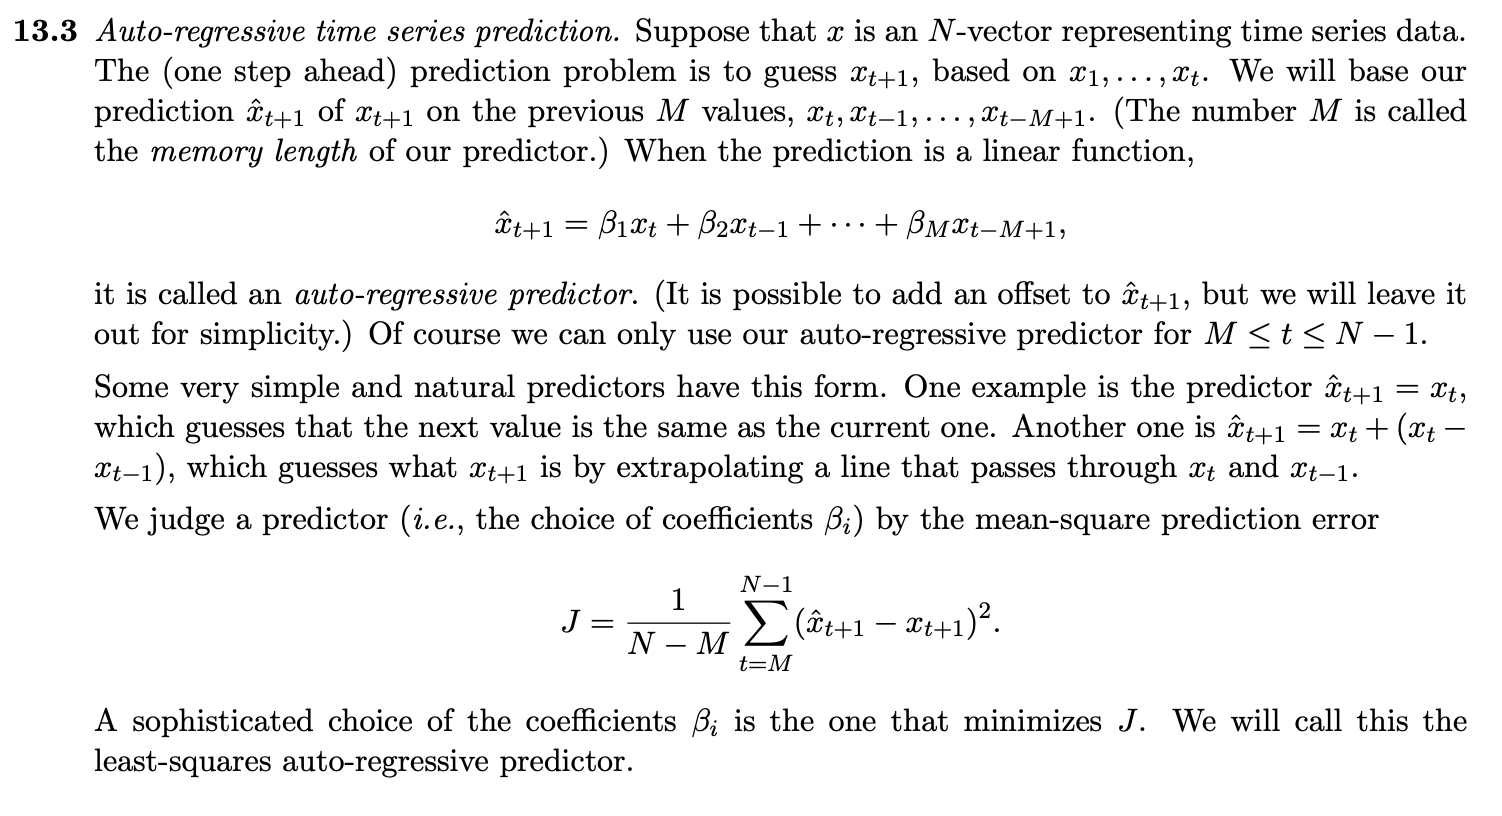

**(a)** Describe the **size** and **entries** of the matrix $A$ and the vector $b$ for which $J = \Vert A\beta - b\Vert^2 / (N-M)$.  This allows you to find the coefficients $\beta$ that minimize $J$, i.e. the auto-regressive predictor that minimizes the mean-square prediction error, simply by solving a standard least-square problem (`β = A \ b` in Julia).

**(b)** Implement an autoregressive model to predict German residential power demand with data from [this tutorial](https://vitalflux.com/autoregressive-ar-models-with-python-examples/#:~:text=Autoregressive%20models%20are%20based%20on,going%20up%20in%20the%20future.) via the code below.

* Fill in the `???` in the `autoregressive_model` to form `A, b` according to (a) for given data `x` and `M`.
* Apply it for `M=8` to find the prediction coefficients $\beta$ from "training" data consisting of the power-demand data excluding the last 100 days.
* Use the last 100 points as "test" data: compare the predictions of your fitted model by plotting the predictions for the last 100 days along with the actual data (fill in the `???`).

In [19]:
# download the raw data (CSV file)
import Downloads
datafile = Downloads.download("https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv")

"/var/folders/m6/jfc_rvn90y58mfgnh0tlc0580000gn/T/jl_J83SB2xa1Q"

4384×5 Matrix{Any}:
 "Date"            "Consumption"     "Wind"    "Solar"     "Wind+Solar"
 "2006-01-01"  1069.18               ""        ""          ""
 "2006-01-02"  1380.52               ""        ""          ""
 "2006-01-03"  1442.53               ""        ""          ""
 "2006-01-04"  1457.22               ""        ""          ""
 "2006-01-05"  1477.13               ""        ""          ""
 "2006-01-06"  1403.43               ""        ""          ""
 "2006-01-07"  1300.29               ""        ""          ""
 "2006-01-08"  1207.98               ""        ""          ""
 "2006-01-09"  1529.32               ""        ""          ""
 "2006-01-10"  1576.91               ""        ""          ""
 "2006-01-11"  1577.18               ""        ""          ""
 "2006-01-12"  1553.28               ""        ""          ""
 ⋮                                                      
 "2017-12-20"  1559.69             90.88      8.799      99.679
 "2017-12-21"  1520.37            259.039  

summary(days) = "4383-element Vector{Int64}"
summary(consumption) = "4383-element Vector{Float64}"


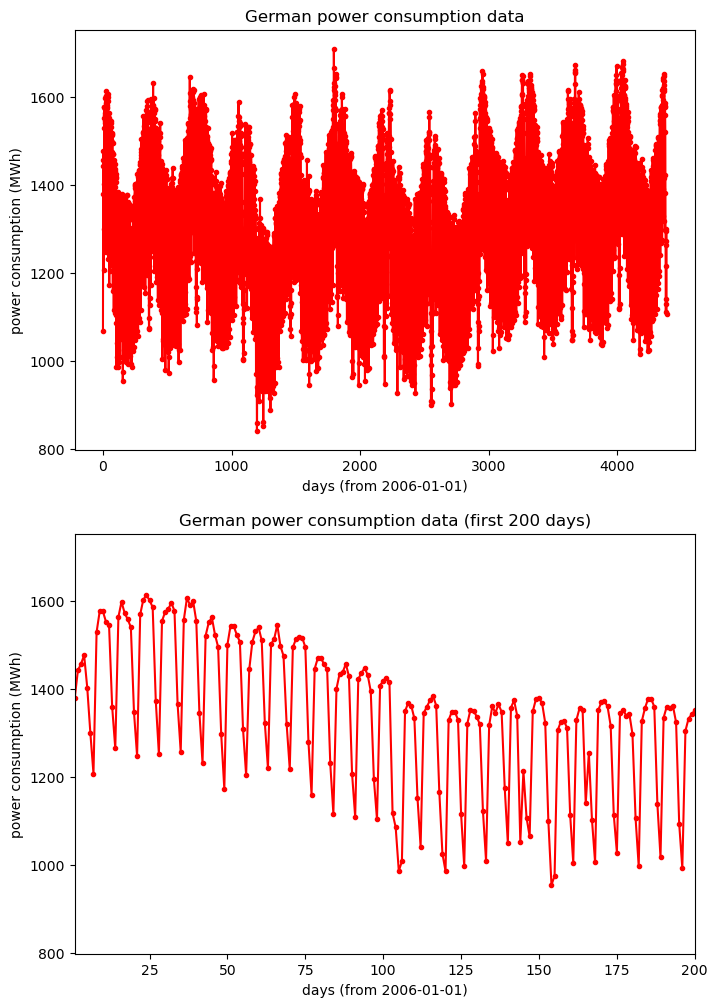

(1.0, 200.0)

In [20]:
# extract the data and plot it:

using DelimitedFiles, Dates
data = readdlm(datafile, ',')
display(data)
dates = parse.(Date, data[2:end, 1])
days = Dates.value.(dates .- dates[1])
consumption = Float64.(data[2:end, 2])
@show summary(days)
@show summary(consumption)

using PyPlot

figure(figsize=(8,12))
subplot(2,1,1)
title("German power consumption data")
plot(days, consumption, "r.-")
xlabel("days (from 2006-01-01)")
ylabel("power consumption (MWh)")

subplot(2,1,2)
title("German power consumption data (first 200 days)")
plot(days, consumption, "r.-")
xlabel("days (from 2006-01-01)")
ylabel("power consumption (MWh)")
xlim(1,200)

In [21]:
# fill in the ??? to get A and b from x and M
function autoregressive_model(x, M)
    N = length(x)
    A = similar(x, (N-M), M) # (N-M) × M matrix of same type as x - filled in for part b
    for i = 1:size(A,1) # fill in A row-by row
        t = M-1+i
        A[i,:] = x[t:-1:t - M + 1] # hint: each row of A comes from a slice of x - filled in for part b
    end
    b = x[M + 1:N] # filled in for part b
    return A, b
end

training_data = consumption[1:end-100]

# construct your A and b from M=8 and find β
M = 8
A, b = autoregressive_model(training_data, M)
β = A \ b # least-square fit

8-element Vector{Float64}:
  0.6478100500722234
 -0.08569044106766756
  0.08122941854537936
 -0.04159805684000669
  0.0030540247873220745
  0.07540381091515767
  0.7940857504360924
 -0.47481957731988506

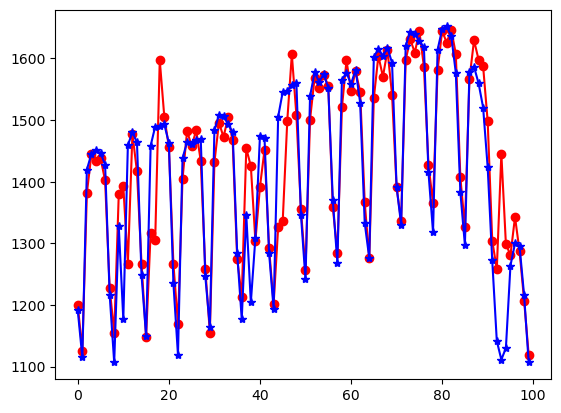

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x129825940>

In [28]:
# test data from last 100+M points:
test_data = consumption[end-99-M:end]

# plot the predictions for the last 100 points along with test data
for i in 1:100 # filled in for problem b
    lagged_vals = test_data[i + M - 1 : -1 : i] # get lagged values
    prediction = dot(β, lagged_vals) # dot with beta
    predictions[i] = prediction # store in predictions
end
plot(predictions, "ro-")
plot(test_data[end-99:end], "b*-")